<a href="https://colab.research.google.com/github/NidhiSrikanth/Class-75/blob/main/project119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load= files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import pandas as pd

df= pd.read_csv("titanic.csv")
print(df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Survived
0            1       3    1  34.5      1      0         0
1            2       1    0  47.0      1      0         1
2            3       3    0  62.0      0      0         1
3            4       1    0  27.0      1      0         1
4            5       3    1  22.0      0      0         0


In [4]:
features= ["PassengerId", "Pclass", "Sex", "Age", "Parch"]
X= df[features]
y= df.Survived

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.25, random_state= 1)
cld= DecisionTreeClassifier()
cld= cld.fit(X_train,y_train)
y_pred= cld.predict(X_test)
print("accurary: ", metrics.accuracy_score(y_test, y_pred))

accurary:  0.695067264573991


In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data= StringIO()
export_graphviz(
    cld,
    out_file= dot_data,
    filled= True,
    special_characters= True,
    feature_names= features,
    class_names= ["0", "1"]
)
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.466<br/>samples = 668<br/>value = [421, 247]<br/>class = 0>, fillcolor="#f4cbad"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.398<br/>samples = 233<br/>value = [64, 169]<br/>class = 1>, fillcolor="#84c2ef"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.105<br/>samples = 126<br/>value = [7, 119]<br/>class = 1>, fillcolor="#45a3e7"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 50.5<br/>gini = 0.415<br/>samples = 17<br/>value = [5, 12]<br/>class = 1>, fillcolor="#8bc6f0"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 294.5<br/>gini = 0.375<br/>samples = 16<br/>value = [4, 12]<br/>class = 1>, fillcolor="#7bbeee"] ;
3 -> 5 ;
6 [label=<Pclass &le; 1.5<br/>gini = 0.198<br/>samples = 9<br/>value = [1, 8]<b

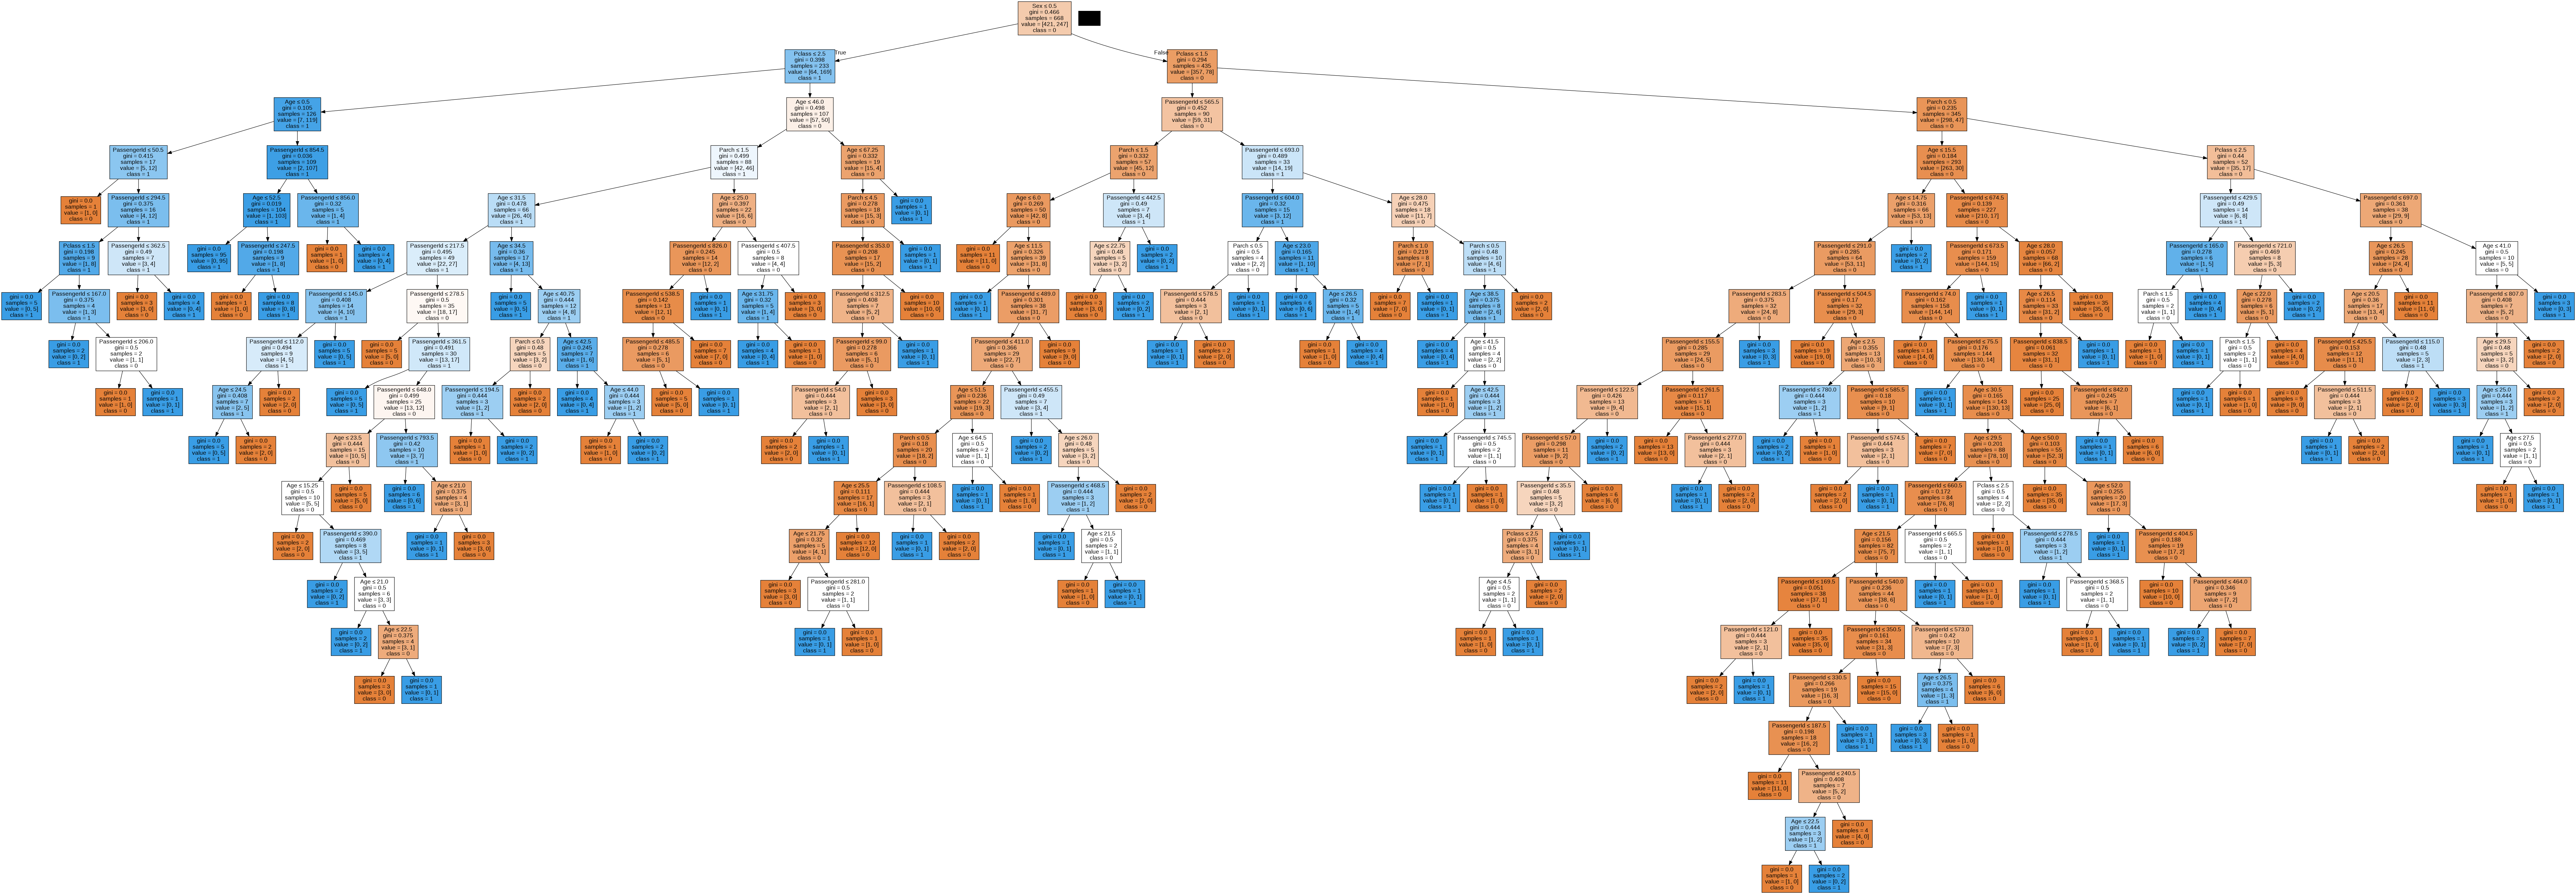

In [11]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
Image(graph.create_png())